<a href="https://colab.research.google.com/github/skflwright/Python_Projects_Data_201/blob/main/Python_project_1_KW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for Data Analytics: Project 1 Assignment**

The goal of this project is to analyze student test performance.
Pick any school as an initial comparison point
Pick a feature/measure/score.
Compare the selected school to schools in the entire dataset, schools in a particular borough or schools in a particular district - you need to do only one additional comparison point but could do more.
The analysis should include some descriptive statistics.
The analysis should include at least one cleaning task.
The analysis should include at least one visualization.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [ ]:
# IMPORT DATA SET
df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")


# **Data Exploration & Upload**

In [ ]:
df.shape

(212331, 15)

In [ ]:
df.head(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na


In [ ]:
df.tail(3)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


**The Data:**

This data reflects the scores of students taking high-school level Regents exams, though students do take them in 8th grade (hence the inclusion of K-8 category schools).  

Grades for each of category of Regents were taken over the years 2015-2017 in June and then aggregated into the number of students scoring above or below 65 or over 80.

The following analysis will compare Regents and college readiness scores for Beacon High School to all schools in Manhattan and all high schools in NYC for the year 2016 (While a greater number of tests was taken in 2015, there were no Math scores for Beacon 2015).  

**Data Source**

The Data is taken from NYC Open Gov's 2014-15 To 2016-17 School- Level NYC Regents Report For All Variables report: (https://data.cityofnewyork.us/Education/2014-15-To-2016-17-School-Level-NYC-Regents-Report/csps-2ne9)

**Data Dictionary:**

The following information can be found at: https://data.cityofnewyork.us/api/views/csps-2ne9/files/3db3f2bd-d8d4-4ab2-b746-42fc56118066?download=true&filename=2014-15_To_2016-17_School_Level_NYC_Regents_Report_For_All_Variables.xlsx

1) Testing and score data includes all administrations of the Regents exam: January, June, and August. It reports the highest score for each student for
each Regents exam for each school year. Non-numeric marks are dropped from the data.  

2) Due to ongoing updates to the data, including late uploads of Regents scores from prior test administrations, the numbers reported will likely change in subsequent years' reports.

3) School DBNs are as of  June 30th for each school year.

4) Pursuant to the legislation and in accordance with the Family Educational Rights and Privacy Act (FERPA), rows with 5 or fewer students have been replaced with an "s". In addition, other rows have been replaced with an "s" when they could reveal, through addition or subtraction, the underlying numbers that have been redacted.

5) CR: College & career readiness scores only apply to ELA and Math exams. The CR benchmarks on Regents exams include:
     - English Regents exam score of 75+
     - Any Math Regents exam score of 80+
     - Common Core-aligned Algebra I or Geometry Regents exam score of 70+ or Algebra II/Trigonometry exam score of 65+

6) Students with disabilities are defined as any child receiving an IEP as of the end of the school year.

7) Data on students with disabilities and English language learners are as of June 30th for each school year.

8) Multiple Race Categories Not Represented columns includes students who do not report their race, as well as students reported as Native American or Multi-Racial.

In [ ]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

All of the columns have the same number of entries and only teh Year and Total Tested are dtype Int. The remaining columns are listed as objects, which will need to be changed for descriptive analysis.

In [ ]:
df.info()
#No need for df.count().


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

#**Data Cleaning**

To clean the data, I first eliminated the columns I would not be using, including all percent data as these could be extracted from the number data.

Rather than impute the "s" values with an average number between 1-5, I chose to eliminate the rows with "s" or "na" because a good number of schools with less than five students taking the test entered the actual number, suggesting that a significant number of the 's' entries might well represent redacted data. To avoid any bias that might affect the performance results of those students that did test and those schools who did correctly include the data, I included and analyzed only completed data provided.

<Axes: >

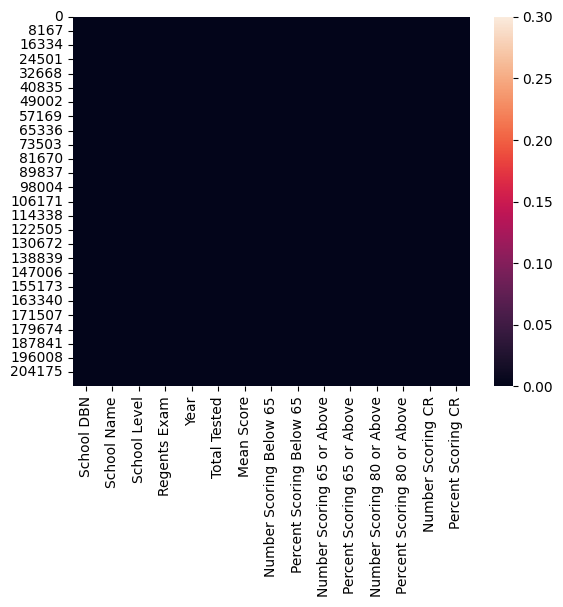

In [ ]:
sns.heatmap(df.isnull(),cbar=True, vmin=0, vmax=.3) #data visualization shows no missing values

Deleted Columns not used for this analysis include the percentage figures based on the numbers provided, which are outlined in the drop_cols cell.

In [ ]:
#Delete columns not used for this analysis.
drop_cols = ['Percent Scoring Below 65','Percent Scoring 65 or Above','Percent Scoring 80 or Above','Percent Scoring CR']
df.drop(drop_cols, inplace=True, axis=1)

In [ ]:
drop_cols

['Percent Scoring Below 65',
 'Percent Scoring 65 or Above',
 'Percent Scoring 80 or Above',
 'Percent Scoring CR']

In [ ]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Number Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Number Scoring CR'],
      dtype='object')

**NOTE: Significant Data Loss Due to Missing or Non-classifiable Data.**

Given that the 's' values can represent 5 or fewer test takers OR redacted grades and that it was not possible to access the source data or uncover which 's' classified cells belonged to which category, I removed them from the analysis. Following, the reader will note that 75,222 rows of data were removed due to the 's' classification. However, mean or median imputing those cells with data would run the risk of biasing or skewing the data and data analysis.

In [ ]:
#Get rid of 's' entries NOTE: You could also create list of missing values as per Lecture 6 but I did this before that
#and don't want to mess with what is already done!
df = df[(df["Mean Score"].str.contains("s") == False) & (df["Number Scoring Below 65"].str.contains("s")==False)&(df["Number Scoring 65 or Above"].str.contains("s")==False) &(df["Number Scoring 80 or Above"].str.contains("s")==False)&(df["Number Scoring CR"].str.contains("s")==False)]
df.head(10) #displaying more rows to see if anything else (like "na") occurring.




,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,15,7,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,8,2,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,6,0,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13,5,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,4,1,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,48,23,48
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,42,33,40
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,51,44,50
11,01M184,P.S. 184m Shuang Wen,K-8,Living Environment,2017,55,83.9,1,54,43,na
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,9,0,2


In [ ]:
df.shape #Removing 'na' entries reduced the number of rows by an additional 67,518!
#Someone needs to talk to the data managers in charge of school Regents data entry!


(137109, 11)

In [ ]:
#Get rid of cells containing "na"
df = df[(df["Mean Score"].str.contains("na") == False) & (df["Number Scoring Below 65"].str.contains("na")==False)&(df["Number Scoring 65 or Above"].str.contains("na")==False) &(df["Number Scoring 80 or Above"].str.contains("na")==False)&(df["Number Scoring CR"].str.contains("na")==False)]
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,48,23,48
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,42,33,40
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0,51,44,50
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14,9,0,2
13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69,6,16,2,15
14,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2017,20,67.4,7,13,1,10
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11,1,0,0
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25,25,3,15
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15,38,6,29
23,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48,6,0,0,0


In [ ]:
df.shape

(69651, 11)

Removing entries with 's' and 'na' reduced the dataset to 69,651 rows from 212,331.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69651 entries, 8 to 212323
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   School DBN                  69651 non-null  object
 1   School Name                 69651 non-null  object
 2   School Level                69651 non-null  object
 3   Regents Exam                69643 non-null  object
 4   Year                        69651 non-null  int64 
 5   Total Tested                69651 non-null  int64 
 6   Mean Score                  69651 non-null  object
 7   Number Scoring Below 65     69651 non-null  object
 8   Number Scoring 65 or Above  69651 non-null  object
 9   Number Scoring 80 or Above  69651 non-null  object
 10  Number Scoring CR           69651 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.4+ MB


In [ ]:
df.isnull().sum() #Verifying using numeric summary shows no missing values in Regents Exam column. These should be removed.

School DBN                    0
School Name                   0
School Level                  0
Regents Exam                  8
Year                          0
Total Tested                  0
Mean Score                    0
Number Scoring Below 65       0
Number Scoring 65 or Above    0
Number Scoring 80 or Above    0
Number Scoring CR             0
dtype: int64

This removes the last of the null values not addresssed already through removing 's' and 'na' values.  The final step will be to remove duplicates.

In [ ]:
df.dropna(inplace=True) #
df.shape

(69643, 11)

In [ ]:
#Check for duplicate entries
df=df.drop_duplicates()
df.shape # 2,041 duplicate rows were removed. Curious to learn what constitutes duplicate in this instance....

(67602, 11)

Next, in order to facilitate numeric analysis, I reassigned the object classified columns to numeric.

In [ ]:
#Re-assign object classified columns as numeric
df = df.astype({"Mean Score":"float","Number Scoring Below 65":"float","Number Scoring 65 or Above": "float","Number Scoring 80 or Above":"float","Number Scoring CR":"float"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67602 entries, 8 to 212323
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School DBN                  67602 non-null  object 
 1   School Name                 67602 non-null  object 
 2   School Level                67602 non-null  object 
 3   Regents Exam                67602 non-null  object 
 4   Year                        67602 non-null  int64  
 5   Total Tested                67602 non-null  int64  
 6   Mean Score                  67602 non-null  float64
 7   Number Scoring Below 65     67602 non-null  float64
 8   Number Scoring 65 or Above  67602 non-null  float64
 9   Number Scoring 80 or Above  67602 non-null  float64
 10  Number Scoring CR           67602 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 6.2+ MB


In [ ]:
df.describe()# We have not ommitted year even though it does not make much sense for describe but other numbers confirm re-assignment.
#Following represents the descriptive summary of all Regents Data for All Schools.
#This data is not really comparable but provides useful information such as the total number tested: 67,602,
#the average score of 65 across all Regents,


,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000
mean,2015.898006,69.494601,65.033211,24.962368,44.532233,17.854279,30.360256
std,0.799492,106.637434,11.229314,38.038172,83.889913,53.002063,69.113377
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,17.000000,57.500000,5.000000,7.000000,0.000000,2.000000
50%,2016.000000,37.000000,64.700000,12.000000,19.000000,3.000000,9.000000
75%,2017.000000,79.000000,72.400000,30.000000,50.000000,14.000000,31.000000
max,2017.000000,1554.000000,98.300000,697.000000,1497.000000,1318.000000,1465.000000


In [ ]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Number Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Number Scoring CR'],
      dtype='object')

Finally, to ensure reader comprehension and enable comparative analysis with other boroughs, I renamed the "School DBN" column to "School District Borough Number". Each borough has a letter and associated district numbers.  For example, DBNs with "M" are for schools in Manhattan, "Q" for schools in Queens, "B" for Brooklyn, "R" for Staten Island and "X" for the Bronx. For more information about NYC School Boroughs and district see: https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-


In [ ]:
#Rename School DBN to School District Borough Number
df.rename(columns={'School DBN':'School District Borough Number'},inplace=True)
df.columns

Index(['School District Borough Number', 'School Name', 'School Level',
       'Regents Exam', 'Year', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Number Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Number Scoring CR'],
      dtype='object')

#**Initial Analysis of Regents Data**


In [ ]:
df.groupby(['School Level'])['School Name'].count()



School Level
High school                        50437
Junior High-Intermediate-Middle     3657
K-12 all grades                     2627
K-8                                 1429
Secondary School                    9452
Name: School Name, dtype: int64

Here we see that the majority of test scores are taken from high school students but that a large number of middle schoolers
are also taking the 9th grade tests.  From the following, we see that 75% of the regents exams are taken by high school students, 21% by middle school students (likely 8th graders) and the remaining 4% by an unclassified grade level in schools with K-12 grades (likely parochial or private or alternative)

<Axes: title={'center': 'Regents Exams Taken by School Level'}, ylabel='School Name'>

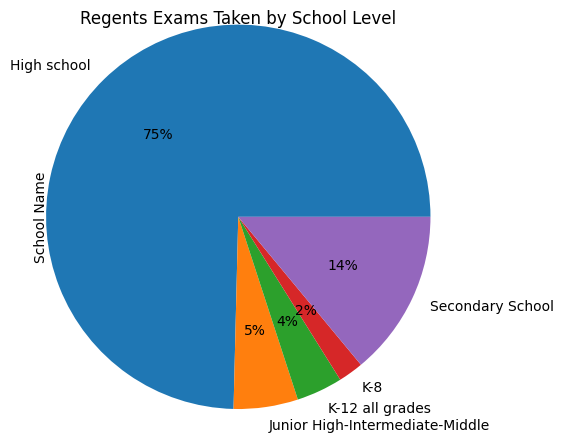

In [ ]:
df.groupby(['School Level'])['School Name'].count().plot(kind="pie", title="Regents Exams Taken by School Level",autopct='%.0f%%',radius=1.3)


In [ ]:
df.groupby(['School Level'])['School Name'].count().sum()

67602

In [ ]:
df.groupby(['Regents Exam'])['Year'].count()  #Here we see that there are multiple Regents Exams as well.
#Given the importance of Math and English in college readiness, we'll focus on those.


Regents Exam
Algebra2/Trigonometry     5013
Common Core Algebra      18948
Common Core Algebra2      4110
Common Core English      13169
Common Core Geometry      9326
English                   6682
Geometry                  4176
Integrated Algebra        6178
Name: Year, dtype: int64

The greatest number of Regents tests taken over aggregately was in the subjects of Alegebra 1 & Common Core English.

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000')])

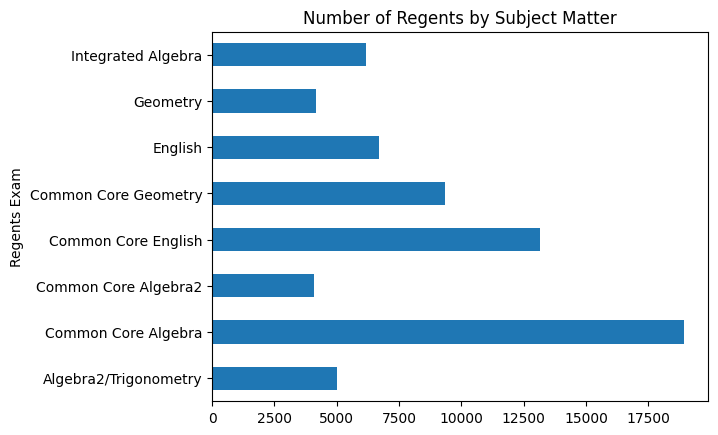

In [ ]:
df.groupby(['Regents Exam'])['School Level'].count().plot(kind="barh",title="Number of Regents by Subject Matter")
plt.xticks(rotation=0)


The total number of students tested each year: the greatest number of Regents tests taken was in the year 2015. However, since Beacon did not have students taking the Regents in 2015, I'll use 2016 as comparison year.

(array([0, 1, 2]),
 [Text(0, 0, '2015'), Text(1, 0, '2016'), Text(2, 0, '2017')])

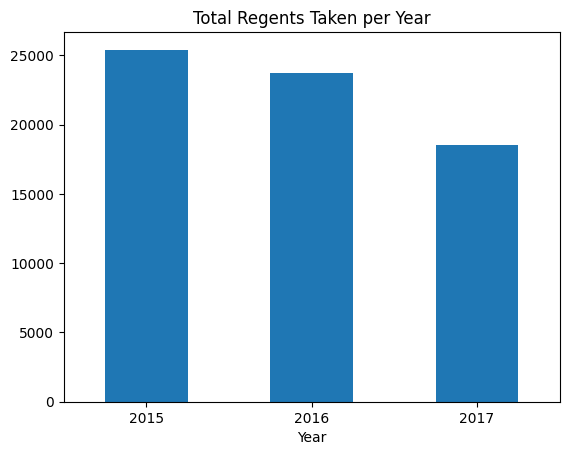

In [ ]:
df.groupby(['Year'])['Total Tested'].count().plot(kind="bar", title="Total Regents Taken per Year")
plt.xticks(rotation=0)

Total Tested counts the number of tests taken and not the number of students (as one student can take up to 5 different tests). This confirms that to make any comparisons, we must break it down by individual Regents Exam and Year.

In [ ]:
df.groupby(['Year'])['Total Tested'].sum() #Lets figure out the actual total number of kids tested in 2016: 1,522,839!!
#(greater than the total number of K-12 students)


Year
2015    1746874
2016    1522839
2017    1428261
Name: Total Tested, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, '2015'), Text(1, 0, '2016'), Text(2, 0, '2017')])

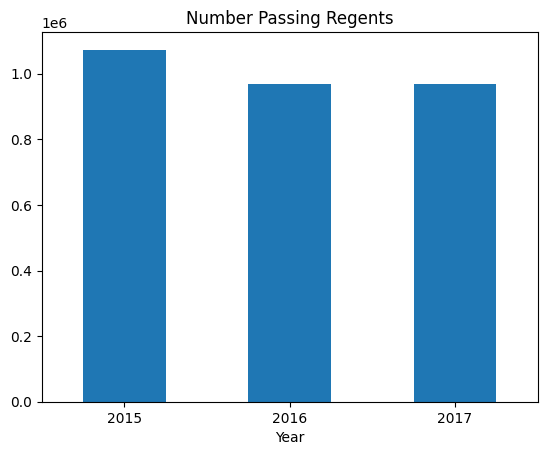

In [ ]:
df.groupby(['Year'])['Number Scoring 65 or Above'].sum().plot(kind='bar',title='Number Passing Regents')
plt.xticks(rotation=0)

In [ ]:
df.groupby(['Year'])['Number Scoring 65 or Above'].sum()
#Here we see that of the total number of tests taken, not necessarily the total tested by number of student.
# So, out of 1,522,839 tests taken, 967,718 or 64% tests received a passing score.

Year
2015    1073302.0
2016     967718.0
2017     969448.0
Name: Number Scoring 65 or Above, dtype: float64

In [ ]:
df.groupby(['Year'])['Number Scoring Below 65'].sum() #This shows that the numbers above correspond correctly to the information provided.

Year
2015    673572.0
2016    555121.0
2017    458813.0
Name: Number Scoring Below 65, dtype: float64

**General Observations about 2016 Regents Data**


*  The most administered and taken tests are the Common Core Alebra and English exams, likely because many schools still require these, though they are not an NYC DOE requirement. The only test that all NYC public school kids need to take is the English exam.
*  In 2016, 1,522,839 regents tests were submitted for grading
*  Of that number, 64% of test takers passed passed the exam, scoring 65 or over
*  36% failed, scoring under 65%








#**Assignment Questions & Analysis**
**1) Compare individual school results to all results in a given measure.School selected: Beacon High School 2016**

#**Beacon High School 2016**

In [ ]:
#Pick one individual school and compare results from that school to all other schools.
df[df['School Name']=='Beacon High School']
df_Beacon=df[df['School Name']=='Beacon High School']
df_Beacon.head()
#2016 is the best year to use as mean scores are not availabe for 2015 or 2017!
#We also see that Beacon is in the borough of Manhattan ("M") and in district 3


,School District Borough Number,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
2640,03M479,Beacon High School,High school,Common Core Algebra,2016,6,70.8,2.0,4.0,2.0,3.0
2642,03M479,Beacon High School,High school,Common Core English,2016,291,91.0,0.0,291.0,276.0,286.0
2643,03M479,Beacon High School,High school,Common Core English,2017,321,90.5,0.0,321.0,307.0,316.0
2646,03M479,Beacon High School,High school,English,2015,370,87.2,0.0,370.0,303.0,347.0
24257,03M479,Beacon High School,High school,Common Core English,2016,275,91.4,0.0,275.0,265.0,272.0


#**Regents Math Test Results Beacon 2016**

In looking at the Beacon Common Core Math data, only six students took the Math Regents Exam! This is likely because it is not required. Most students who gain acceptance into Beacon have already scored well in Math and English.

In [ ]:
df[df['School Name']=='Beacon High School']
df_Beacon_16= df[(df['School Name']=='Beacon High School')&(df['Year'] == 2016)]
df_Beacon_16_Alg = df[(df['School Name']=='Beacon High School') & (df['Year']== 2016) & (df['Regents Exam']=='Common Core Algebra')]
df_Beacon_16_Alg.describe() #Here we see that there is no standard deviation for the 2016 Alg Regents numbers. The reason for this is that there is only one row of data that has been aggregated. As such
#we can compare the mean to the mean of all schools and the college readiness mean to the mean of all schools.


,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,2016.0,6.0,70.8,2.0,4.0,2.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.0,6.0,70.8,2.0,4.0,2.0,3.0
25%,2016.0,6.0,70.8,2.0,4.0,2.0,3.0
50%,2016.0,6.0,70.8,2.0,4.0,2.0,3.0
75%,2016.0,6.0,70.8,2.0,4.0,2.0,3.0
max,2016.0,6.0,70.8,2.0,4.0,2.0,3.0


In [ ]:
#to confirm that there is only one row for Beacon 2016 Algebra
df_Beacon_16_Alg.shape


(1, 11)

In [ ]:
df_Beacon_16_Alg.mean()

<ipython-input-43-1a0932f0d86f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Beacon_16_Alg.mean()


Year                          2016.0
Total Tested                     6.0
Mean Score                      70.8
Number Scoring Below 65          2.0
Number Scoring 65 or Above       4.0
Number Scoring 80 or Above       2.0
Number Scoring CR                3.0
dtype: float64

In [ ]:
df_Beacon_16_Alg.sum()

School District Borough Number                 03M479
School Name                        Beacon High School
School Level                              High school
Regents Exam                      Common Core Algebra
Year                                             2016
Total Tested                                        6
Mean Score                                       70.8
Number Scoring Below 65                           2.0
Number Scoring 65 or Above                        4.0
Number Scoring 80 or Above                        2.0
Number Scoring CR                                 3.0
dtype: object

#**Regents Math Test Results for All Schools 2016**

In [ ]:
df[df['Year']==2016] #Create comparison year for all schools for "Common Core Algebra" in 2016
df_16=df[df['Year']==2016]
df_16_Alg=df[(df['Year']==2016) & (df['Regents Exam']=='Common Core Algebra')]
df_16_Alg.describe()



,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,6408.0,6408.000000,6408.000000,6408.000000,6408.000000,6408.000000,6408.000000
mean,2016.0,82.818508,68.433817,29.286361,53.532147,15.906991,40.253121
std,0.0,112.229183,9.669473,44.968694,77.935067,31.700867,61.336931
min,2016.0,6.000000,41.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,20.000000,61.200000,3.000000,11.000000,1.000000,8.000000
50%,2016.0,49.000000,67.000000,13.000000,30.000000,5.000000,22.000000
75%,2016.0,103.000000,75.300000,39.000000,66.000000,16.000000,48.000000
max,2016.0,1258.000000,94.100000,521.000000,884.000000,478.000000,744.000000


In [ ]:
df_16_Alg.sum()

School District Borough Number    01M18401M18801M29201M37801M44801M45001M50901M5...
School Name                       P.S. 184m Shuang WenP.S. 188 The Island School...
School Level                      K-8K-8High schoolJunior High-Intermediate-Midd...
Regents Exam                      Common Core AlgebraCommon Core AlgebraCommon C...
Year                                                                       12918528
Total Tested                                                                 530701
Mean Score                                                                 438523.9
Number Scoring Below 65                                                    187667.0
Number Scoring 65 or Above                                                 343034.0
Number Scoring 80 or Above                                                 101932.0
Number Scoring CR                                                          257942.0
dtype: object

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

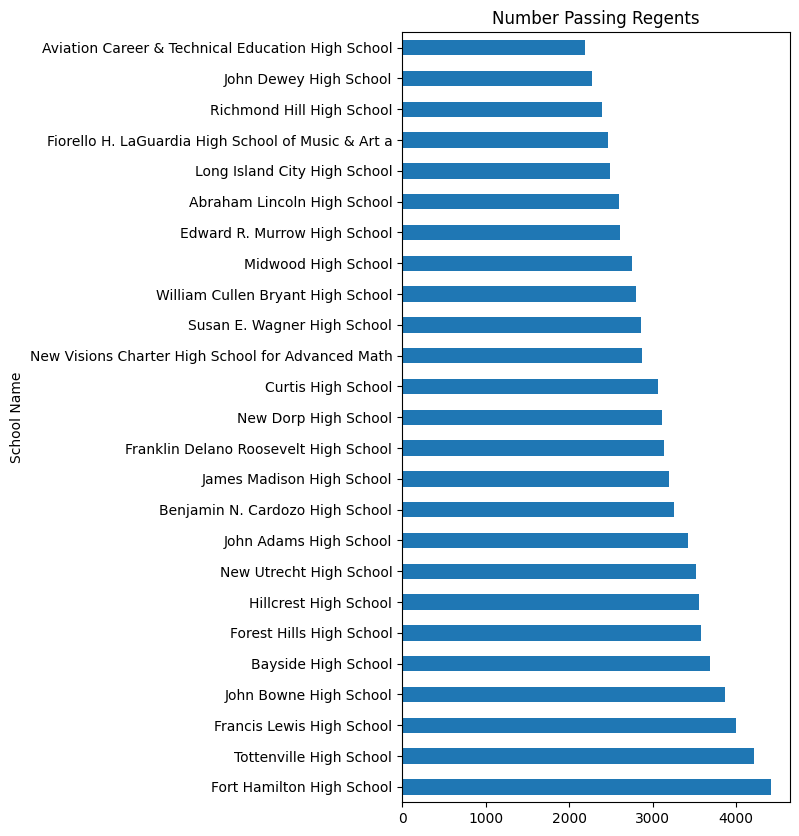

In [ ]:
#Compare All Passing Common Core Algebra Tests by School Name Visually
df_16_Alg.groupby(['School Name'])['Number Scoring 65 or Above'].sum().sort_values(ascending=False).head(25).plot(kind='barh',figsize=(5,10),title='Number Passing Regents')
plt.xticks(rotation=0)

#comparison of schools

#**English Regents Test Results Beacon 2016**
Note: Significantly, this is the only Regents that the students are required to take. Every student that takes it passes it, and 95% score over 80 on the test, confirming that the mean score of 89.9 is not skewed by outliers.

In [ ]:
df_Beacon_16_Eng = df[(df['School Name']=='Beacon High School') & (df['Year']== 2016) & (df['Regents Exam']=='Common Core English')]
df_Beacon_16_Eng.describe()


,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.000000
mean,2016.0,142.900000,89.940000,0.0,142.900000,135.600000,140.400000
std,0.0,104.714904,2.392674,0.0,104.714904,101.400416,103.588073
min,2016.0,16.000000,84.000000,0.0,16.000000,11.000000,14.000000
25%,2016.0,51.500000,89.275000,0.0,51.500000,46.000000,49.500000
50%,2016.0,117.500000,91.000000,0.0,117.500000,115.500000,116.500000
75%,2016.0,239.250000,91.250000,0.0,239.250000,229.000000,235.250000
max,2016.0,291.000000,92.300000,0.0,291.000000,276.000000,286.000000


In [ ]:
df_Beacon_16_Eng.sum()

School District Borough Number    03M47903M47903M47903M47903M47903M47903M47903M4...
School Name                       Beacon High SchoolBeacon High SchoolBeacon Hig...
School Level                      High schoolHigh schoolHigh schoolHigh schoolHi...
Regents Exam                      Common Core EnglishCommon Core EnglishCommon C...
Year                                                                          20160
Total Tested                                                                   1429
Mean Score                                                                    899.4
Number Scoring Below 65                                                         0.0
Number Scoring 65 or Above                                                   1429.0
Number Scoring 80 or Above                                                   1356.0
Number Scoring CR                                                            1404.0
dtype: object

#**English Regents Test Results for All Schools 2016**

In [ ]:
df[df['Year']==2016] #Create comparison year for all schools for "Common Core English" in 2016
df_16=df[df['Year']==2016]
df_16_Eng=df[(df['Year']==2016) & (df['Regents Exam']=='Common Core English')]
df_16_Eng.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,4980.0,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2016.0,80.031124,71.016265,15.582932,64.448193,39.416265,48.655422
std,0.0,117.576574,11.474624,22.537745,104.467834,80.863422,90.039228
min,2016.0,6.000000,26.200000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,22.000000,64.500000,3.000000,14.000000,6.000000,8.000000
50%,2016.0,49.000000,72.200000,9.000000,37.000000,17.000000,24.000000
75%,2016.0,90.000000,78.900000,19.000000,71.250000,39.000000,52.000000
max,2016.0,1554.000000,95.700000,360.000000,1311.000000,1290.000000,1306.000000


In [ ]:
df_16_Eng.sum()

School District Borough Number    01M29201M44801M45001M45801M50901M51501M53901M6...
School Name                       Orchard Collegiate AcademyUniversity Neighborh...
School Level                      High schoolHigh schoolSecondary SchoolHigh sch...
Regents Exam                      Common Core EnglishCommon Core EnglishCommon C...
Year                                                                       10039680
Total Tested                                                                 398555
Mean Score                                                                 353661.0
Number Scoring Below 65                                                     77603.0
Number Scoring 65 or Above                                                 320952.0
Number Scoring 80 or Above                                                 196293.0
Number Scoring CR                                                          242304.0
dtype: object

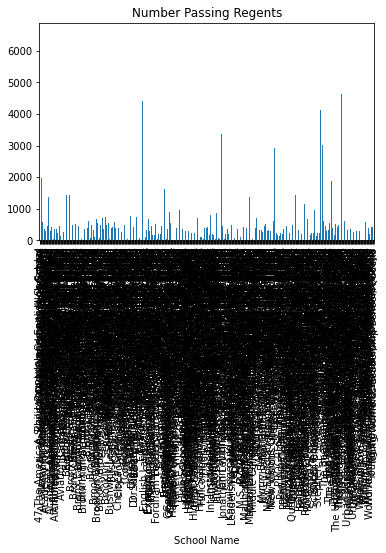

In [ ]:
#Compare All Passing Common Core English Tests by School Name Visually - trying out a different method
df_16_Eng.groupby(['School Name'])['Number Scoring 65 or Above'].sum().plot(kind='bar',title='Number Passing Regents')
#comparison of schools

#**English College Readiness Results for All Schools**

Note: The scores seem to be missing when filtering the dataframe to get to them but they are listed and so manually summarized and analyzed.

In [ ]:
#df[df['Year']==2016] #Create comparison year for all schools for "College Readiness " in 2016. It can be gleaned
#from the NaN values below, that not all schools calculated this or that it is not calculated automatically?
df_16=df[df['Year']==2016]
df_16_CR=df[(df['Year']==2016) & (df['Regents Exam']=='Number Scoring CR')]
df_16_CR.describe() #DATA NOT AVAILABLE

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_16_CR.shape

(0, 11)

##**Assignment Question 2: Compare the Selected School to the Entire dataset of schools.**
**Note: I am focusing on the comparison of each regents subject for comparison.**

#**Comparison of Mean Math Test Scores between Beacon and All Schools**

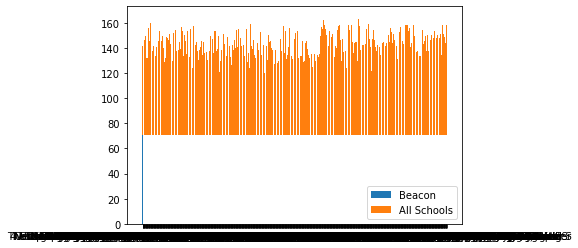

In [ ]:
#Compare Beacon High School Mean test score in Algebra 1 to Mean test score for all Manhattan Schools:
import matplotlib.pyplot as plt
plt.bar(df_Beacon_16_Alg['School Name'],df_Beacon_16_Alg['Mean Score'], label = 'Beacon')
plt.bar(df_16_Alg['School Name'],df_16_Alg['Mean Score'],bottom=df_Beacon_16_Alg['Mean Score'], label = 'All Schools')
plt.legend()
plt.show()
#Not a good visual



#**Assignment Question 3: Comparison of School to Borough: Beacon to other schools in Manhattan**

In [ ]:
df[df['School District Borough Number'].str.contains('M')]
Manhattan = df[df['School District Borough Number'].str.contains('M')]
Manhattan.shape

(15695, 11)

In [ ]:
Manhattan.isnull().sum()

School District Borough Number    0
School Name                       0
School Level                      0
Regents Exam                      0
Year                              0
Total Tested                      0
Mean Score                        0
Number Scoring Below 65           0
Number Scoring 65 or Above        0
Number Scoring 80 or Above        0
Number Scoring CR                 0
dtype: int64

In [ ]:
Manhattan.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000,15695.000000
mean,2015.908251,56.241351,67.120586,17.694106,38.547244,17.525518,27.730933
std,0.805545,71.859726,11.587933,24.100283,63.212846,48.506302,57.031977
min,2015.000000,6.000000,24.900000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,16.000000,59.200000,3.000000,7.000000,1.000000,3.000000
50%,2016.000000,35.000000,66.800000,9.000000,19.000000,4.000000,10.000000
75%,2017.000000,71.000000,75.400000,22.000000,48.000000,17.000000,32.000000
max,2017.000000,909.000000,98.300000,310.000000,909.000000,867.000000,908.000000


In [ ]:
df[df['Year']==2016] #Create comparison year for all schools for "Common Core Algebra" in 2016
df_16=df[df['Year']==2016]
df_16_Alg=df[(df['Year']==2016) & (df['Regents Exam']=='Common Core Algebra')]
df_16_Alg.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,6408.0,6408.000000,6408.000000,6408.000000,6408.000000,6408.000000,6408.000000
mean,2016.0,82.818508,68.433817,29.286361,53.532147,15.906991,40.253121
std,0.0,112.229183,9.669473,44.968694,77.935067,31.700867,61.336931
min,2016.0,6.000000,41.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,20.000000,61.200000,3.000000,11.000000,1.000000,8.000000
50%,2016.0,49.000000,67.000000,13.000000,30.000000,5.000000,22.000000
75%,2016.0,103.000000,75.300000,39.000000,66.000000,16.000000,48.000000
max,2016.0,1258.000000,94.100000,521.000000,884.000000,478.000000,744.000000


In [ ]:
Manhattan[Manhattan['Year']==2016]
Manhattan_16=Manhattan[Manhattan['Year']==2016]
Manhattan_16_Alg=Manhattan[(Manhattan['Year']==2016) & (Manhattan['Regents Exam']=='Common Core Algebra')]

In [ ]:
Manhattan_16_Alg.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 65 or Above,Number Scoring 80 or Above,Number Scoring CR
count,1413.0,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,2016.0,68.794055,69.704105,22.346072,46.447983,15.666667,36.236377
std,0.0,67.424804,9.517698,29.011180,51.561725,28.356193,44.467076
min,2016.0,6.000000,44.300000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,21.000000,62.200000,2.000000,12.000000,2.000000,9.000000
50%,2016.0,50.000000,68.800000,10.000000,32.000000,6.000000,23.000000
75%,2016.0,94.000000,77.300000,32.000000,64.000000,19.000000,48.000000
max,2016.0,518.000000,94.100000,183.000000,506.000000,341.000000,477.000000


In [ ]:
Manhattan_16_Alg.sum()

School District Borough Number    01M18401M18801M29201M37801M44801M45001M50901M5...
School Name                       P.S. 184m Shuang WenP.S. 188 The Island School...
School Level                      K-8K-8High schoolJunior High-Intermediate-Midd...
Regents Exam                      Common Core AlgebraCommon Core AlgebraCommon C...
Year                                                                        2848608
Total Tested                                                                  97206
Mean Score                                                                  98491.9
Number Scoring Below 65                                                     31575.0
Number Scoring 65 or Above                                                  65631.0
Number Scoring 80 or Above                                                  22137.0
Number Scoring CR                                                           51202.0
dtype: object

In [ ]:
Manhattan[Manhattan['Year']==2016]
Manhattan_16=Manhattan[Manhattan['Year']==2016]
Manhattan_16_Eng=Manhattan[(Manhattan['Year']==2016) & (Manhattan['Regents Exam']=='Common Core English')]

In [ ]:
Manhattan_16_Eng.sum()

School District Borough Number    01M29201M44801M45001M45801M50901M51501M53901M6...
School Name                       Orchard Collegiate AcademyUniversity Neighborh...
School Level                      High schoolHigh schoolSecondary SchoolHigh sch...
Regents Exam                      Common Core EnglishCommon Core EnglishCommon C...
Year                                                                        2461536
Total Tested                                                                  77090
Mean Score                                                                  90992.5
Number Scoring Below 65                                                     10870.0
Number Scoring 65 or Above                                                  66220.0
Number Scoring 80 or Above                                                  44258.0
Number Scoring CR                                                           52627.0
dtype: object

In [ ]:
from pandas.io.pytables import SeriesFixed
#Create the mother of all comparisons for Beacon against Manhattan and All NYC Schools for Math, English and College Readiness
#First create series for each:
School = pd.Series(['Beacon','Manhattan','All NYC Boroughs'])
Total_Regents_Math = pd.Series([6,97200,530695])
Math_Passing = pd.Series([4,65627,343030])
Math_Over_80= pd.Series([2,22135,101930])
College_Ready_Math = pd.Series([3,51199,257939])
Total_Regents_English = pd.Series([1429,75661,397126])
English_Passing = pd.Series([1429,64791,319523])
English_Over_80 = pd.Series([1356,42902,194937])
College_Ready_English = pd.Series([1404,51223,240900])


#**Final Summary Comparison of Beacon to other Schools in Manhattan and to all NYC schools that tested for Regents Math and English in 2016**
Note: Due to my limited understanding of how to manipulate dataframe rows and compare components of different data frames, I created a number of series columns which I then created an indexed dataframe for in order to compare the raw numbers for each category of interest.
In order to ensure that the numbers were accurate I subtracted the Beacon figures from the aggregated numbers for Manhattan and All NYC Schools. I did this manually.


In [ ]:
pd.DataFrame([School,Total_Regents_Math,Math_Passing,Math_Over_80,College_Ready_Math,Total_Regents_English,English_Passing,English_Over_80, College_Ready_English],index=['School','Total_Regents_Math','Math_Passing','Math_Over_80','College_Ready_Math','Total_Regents_English','English_Passing','English_Over_80','College_Ready_English'])

,0,1,2
School,Beacon,Manhattan,All NYC Boroughs
Total_Regents_Math,6,97200,530695
Math_Passing,4,65627,343030
Math_Over_80,2,22135,101930
College_Ready_Math,3,51199,257939
Total_Regents_English,1429,75661,397126
English_Passing,1429,64791,319523
English_Over_80,1356,42902,194937
College_Ready_English,1404,51223,240900


#**Summary:**

**Project Assignment**

This first assignment got us working with dirty data from NYC DOE Regents test scores. I selected Beacon High School as the school for comparison.

**Data Source**
The data source can be found through NYC Open Data but was provided to us in class.

**Data Cleaning**
To clean the data, I analyzed the data source, reviewed the data for discrepencies, missing values and anomomlies. As I was unable to determine how many of the 's' valued cells constituted redacted values versus how many represented 5 or fewer students (and since many schools with under 5 taking the test, listed the actual number), I chose to remove these rows even though the
result was to more than half the dataset to avoid bias and faulty analysis.

**Key Insights from Analysis of NYC Regents Scores**

75% of the regents exams are taken by high school students, 21% by middle
school students (likely 8th graders) and the remaining 4% by an unclassified grade level in schools with K-12 grades (likely parochial or private or alternative)

A greater number of students take the Common Core Regents Math exam than the English exam. Further anlaysis might indicate that the majority taking this test are in middle school or first year high school as it would help efforts to gain acceptance or transfer into a good high-school. NYC has over 400 high schools, only 30 or so of which are considered nationally competitive.

Across NYC, whether in Manhattan or Beacon, over 80% of students who take the English Regents pass, with only a 5% differential between Manhattan and the other boroughs.  

Across NYC, 60% of students who take the Math Regents pass.

Beacon High School was likely not the best choice for assessing Regents Exam Scores as they only require the English Regents. Further analysis would need to be made to determine which schools require all regents or the percentage of students seeking a Regents diploma for college applications.

College Readiness is defined as students receiving a score of 75 or greater in English and 70 or more for Algebra1 or Geometry and 65 for Algebra 2/
Trigonometry. 61% of all NYC English Regents test takers achieved college readiness scores, while on 49% of students taking Math Regents achieved college readiness levels.